In [33]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import to_categorical
import tensorflow.keras.losses

In [34]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [35]:
len(x_train)

60000

In [36]:
len(x_test)

10000

In [37]:
x_train[0].shape

(28, 28)

In [38]:
x_train[50000].shape

(28, 28)

In [39]:
x_test[0].shape

(28, 28)

In [40]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

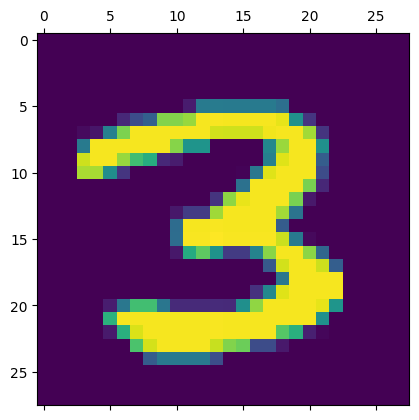

In [41]:
plt.matshow(x_train[7841])

In [42]:
y_train[7841]

3

In [43]:
y_train[:15]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1], dtype=uint8)

In [44]:
x_train.shape

(60000, 28, 28)

In [45]:
x_train = x_train / 255
x_test = x_test / 255

In [46]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [47]:
# Reshape the data to fit the LSTM input shape
timesteps = x_train.shape[1]
input_dim= x_train.shape[2]
x_train = x_train.reshape(-1, timesteps, input_dim)
x_test = x_test.reshape(-1, timesteps, input_dim)

In [48]:
x_train.shape

(60000, 28, 28)

In [49]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [50]:
# Build the LSTM model
model = Sequential([
    LSTM(units=128, activation ='relu', input_shape=(timesteps, input_dim)),
    Dense(units=10, activation = 'softmax')
])

In [54]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [55]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 128)               80384     
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 81674 (319.04 KB)
Trainable params: 81674 (319.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [56]:
# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 29s 17ms/step - loss: 0.5139 - accuracy: 0.8360 - val_loss: 0.1775 - val_accuracy: 0.9510
Epoch 2/10
1500/1500 [==============================] - 26s 18ms/step - loss: 0.1321 - accuracy: 0.9592 - val_loss: 0.1082 - val_accuracy: 0.9676
Epoch 3/10
1500/1500 [==============================] - 26s 17ms/step - loss: 0.0942 - accuracy: 0.9716 - val_loss: 0.0851 - val_accuracy: 0.9741
Epoch 4/10
1500/1500 [==============================] - 27s 18ms/step - loss: 0.0725 - accuracy: 0.9783 - val_loss: 0.0894 - val_accuracy: 0.9743
Epoch 5/10
1500/1500 [==============================] - 26s 17ms/step - loss: 0.0585 - accuracy: 0.9815 - val_loss: 0.0707 - val_accuracy: 0.9794
Epoch 6/10
1500/1500 [==============================] - 26s 17ms/step - loss: 0.0528 - accuracy: 0.9835 - val_loss: 0.0612 - val_accuracy: 0.9818
Epoch 7/10
1500/1500 [==============================] - 26s 17ms/step - loss: 0.0429 - accuracy: 0.9872 - val_loss: 0.0662 -

In [57]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 7ms/step - loss: 0.0545 - accuracy: 0.9839


[0.054463569074869156, 0.9839000105857849]

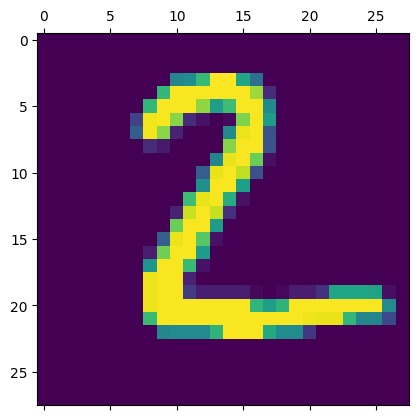

In [58]:
plt.matshow(x_test[1])

In [59]:
y_predicted = model.predict(x_test)
y_predicted[1]

313/313 [==============================] - 2s 7ms/step


array([8.8575823e-16, 2.3036716e-13, 1.0000000e+00, 3.4331468e-10,
       4.9930426e-19, 9.8308446e-14, 4.0977164e-17, 3.9040619e-17,
       4.9633352e-14, 5.4865618e-21], dtype=float32)

In [60]:
np.argmax(y_predicted[1])

2

In [62]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [63]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [66]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 976,    0,    0,    1,    0,    0,    2,    1,    0,    0],
       [   0, 1127,    1,    1,    0,    0,    1,    0,    5,    0],
       [   4,    1, 1011,    5,    0,    0,    2,    4,    5,    0],
       [   0,    0,    3, 1001,    0,    2,    0,    0,    4,    0],
       [   0,    0,    0,    0,  956,    0,    7,    0,    3,   16],
       [   2,    0,    0,   10,    0,  873,    2,    1,    3,    1],
       [   5,    2,    0,    0,    0,    2,  947,    0,    2,    0],
       [   2,    3,   10,    2,    0,    0,    0, 1000,    4,    7],
       [   2,    0,    1,    0,    0,    0,    3,    2,  966,    0],
       [   0,    0,    0,    6,    3,    1,    0,    3,   14,  982]])>

Text(95.72222222222221, 0.5, 'Truth')

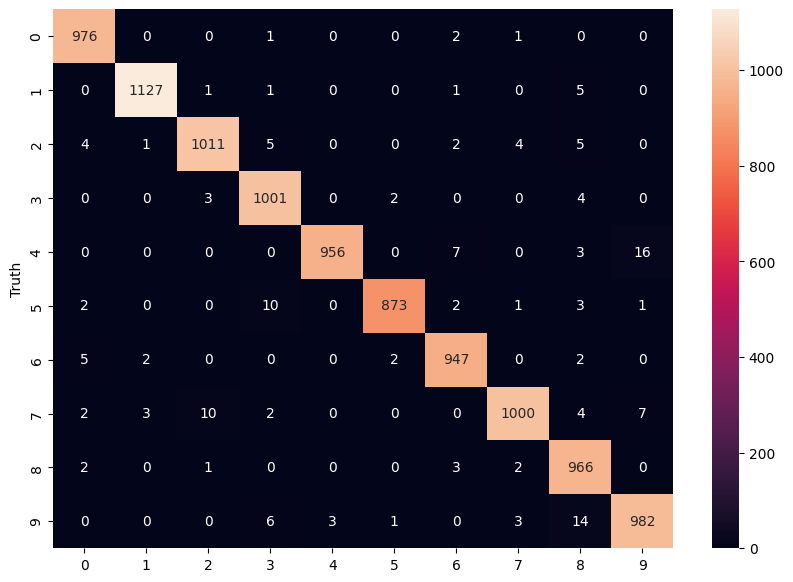

In [67]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.ylabel('Truth')